In [19]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CODE = "/local/home/aarslan/mq"

annotation_json_file_path = f"{CODE}/scripts/07_reproduce_baseline_results/data/ego4d/ego4d_clip_annotations_v4.json"

with open(annotation_json_file_path, "r") as annotation_json_file:
    annotation_dict = json.load(annotation_json_file)

annotations_data = []

for clip_id, clip_info in annotation_dict.items():
    video_id = clip_info["video_id"]
    duration = clip_info["duration"]
    v_duration = clip_info["v_duration"]
    fps = clip_info["fps"]
    subset = clip_info["subset"]
    if subset in ["train", "val"]:
        for annotation in clip_info["annotations"]:
            annotations_data.append((subset, annotation["label"], video_id, clip_id, duration, v_duration, fps, annotation["segment"][1] - annotation["segment"][0]))
    else:
        annotations_data.append((subset, np.NaN, video_id, clip_id, duration, v_duration, fps, np.NaN))

annotations_df = pd.DataFrame(data=annotations_data, columns=["subset", "label", "video_id", "clip_id", "duration", "video_duration", "fps", "clip_duration"])


# FPS Histogram

Text(0.5, 1.0, 'Histogram of clip FPS values')

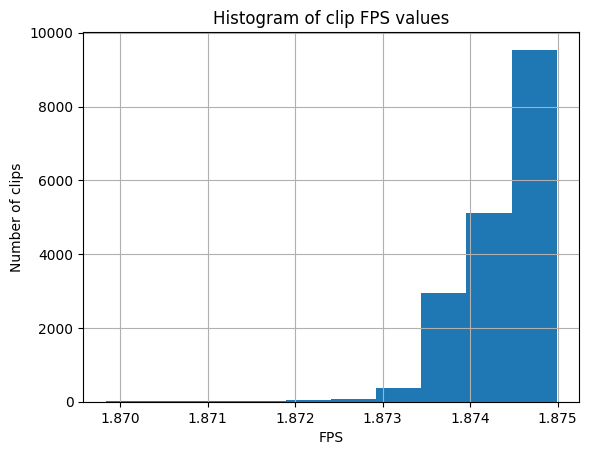

In [20]:
annotations_df["fps"].hist(bins=10)
plt.xlabel("FPS")
plt.ylabel("Number of clips")
plt.title("Histogram of clip FPS values")


# Number of Clips per Subset Histogram

<Axes: >

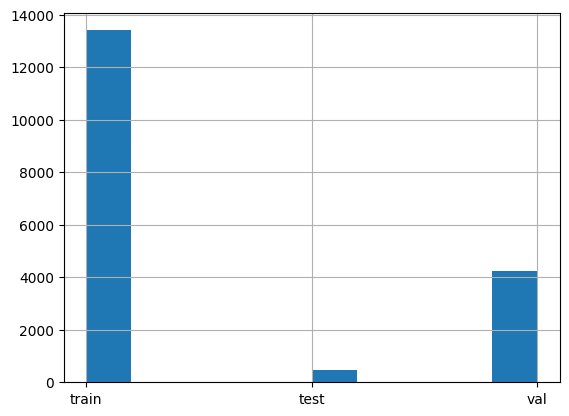

In [21]:
annotations_df["subset"].hist()


# Number of Annotations per Clip Histogram

<Axes: >

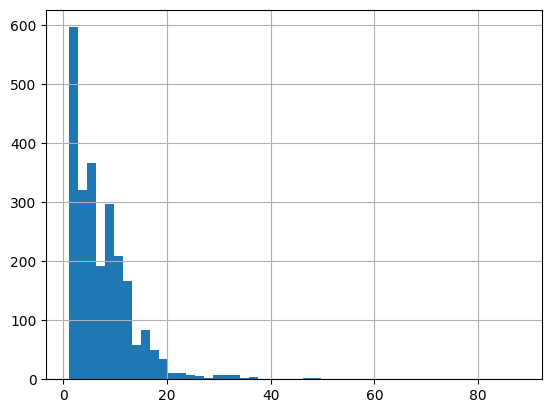

In [25]:
annotations_df.groupby("clip_id").count()["subset"].hist(bins=50)

# Number of Clips per Video Histogram

In [27]:
annotations_df.groupby(["video_id", "clip_id"]).agg({""})
